# 플레이스토어 리뷰 데이터분석으로 본 '배달의 민족'의 경쟁력 강화 전략
##### 코드 참고 자료: https://hayden-study.tistory.com/32

---
####'배달의 민족', '쿠팡이츠' 수집
#### 수집 기간: 2021년 1월 1일 ~ 2024년 8월 31일  
#### 수집 항목:
1. 날짜(YYYY:MM:DD):date
2. 별점: score
3. 리뷰 내용: content
---
#### 변수명
#####1. 크롤링
- '배달의 민족'크롤링 데이터프레임 변수명:sampleapp_reviews_df  
- '배달의 민족' csv 파일명: sampleapp_reviews_날짜_to_날짜
- '쿠팡이츠' 크롤링 데이터프레임 변수명:coupang_reviews_df
- '쿠팡이츠' csv 파일명: coupang_reviews_날짜_to_날짜
---

#####2. 형태소 분석 완료: 형태소 분석, 사용자사전, 한글자 이하, 비어있는 열 삭제
- '배달의 민족' **형태소분석완** 변수명: okt_sampleapp_reviews_df
- '배달의 민족' 형태소분석완 파일명: okt_sampleapp_reviews_df
- '쿠팡이츠' **형태소분석완** 변수명: okt_coupang_reviews_df
- '쿠팡이츠' 형태소분석완 파일명: okt_coupang_reviews_df
---

#####3. 불용어 처리 완료: 공통어/어플별
- '배달의 민족' **불용어처리완** 변수명: sw_sampleapp_reviews_df
- '쿠팡이츠' **불용어처리완** 변수명: sw_coupang_reviews_df
- '배달의 민족' 불용어처리완 파일명: sw_sampleapp_reviews_df
- '쿠팡이츠' 불용어처리완 파일명: sw_coupang_reviews_d

---
#####4. LDA
- '배달의 민족' lda 변수명: sampleapp_reviews_df
- '배달의 민족' lda 변수명: sampleapp_lda_result.html / sampleapp_topic_prop.xlxs
- '쿠팡이츠' lda 변수명:coupang_reviews_df
- '쿠팡이츠' lda 변수명: coupang_lda_result.html / coupang_topic_prop.xlxs

- '배달의 민족' 부정 lda 변수명: negative_sampleapp_reviews_df
- '배달의 민족' 부정 lda 변수명: negative_sampleapp_lda_result.html / negative_sampleapp_topic_prop.xlxs
- '쿠팡이츠' 긍정 lda 변수명: positive_coupang_reviews_df
- '쿠팡이츠' 긍정 lda 변수명: positive_coupang_lda_result.html / coupang_topic_prop.xlxs

---

#### EDA 시각화
1.쿠팡이츠 vs 배달의민족 Score 점수 분포

2.쿠팡이츠 주 별 Score 점수의 추이

3.배달의민족 주 별 Score 점수의 추이

4.쿠팡이츠 VS 배달의민족 리뷰 수

5.쿠팡이츠 VS 배달의민족 평균 별점

---
#### 워드클라우드
1.연도별 쿠팡이츠 워드클라우드

2.연도별 배달의민족 워드클라우드

3.긍정 쿠팡이츠 워드클라우드

4.부정 쿠팡이츠 워드클라우드

5.긍정 배달의민족 워드클라우드

6.부정 배달의민족 워드클라우드

---
#### LDA
1.쿠팡이츠 LDA

2.배달의민족 LDA

3.쿠팡이츠 긍정 LDA

4.배달의민족 부정 LDA


In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

coupang_reviews_df=pd.read_csv("/content/drive/MyDrive/ICT_설렁탕후루/csv/sw_coupang_reviews_df.csv")
sampleapp_reviews_df=pd.read_csv("/content/drive/MyDrive/ICT_설렁탕후루/csv/sw_sampleapp_reviews_df.csv")

In [3]:
import ast

# 문자열로 되어 있는 리스트를 실제 리스트로 변환
coupang_reviews_df['filtered_content'] = coupang_reviews_df['filtered_content'].apply(lambda x: ast.literal_eval(x))
sampleapp_reviews_df['filtered_content'] = sampleapp_reviews_df['filtered_content'].apply(lambda x: ast.literal_eval(x))

##### EDA

##### **사용 색상**
- 쿠팡 : #C64132
- 배민 : #5FBEBB

**쿠팡이츠 vs 배달의민족 Score 점수 분포**

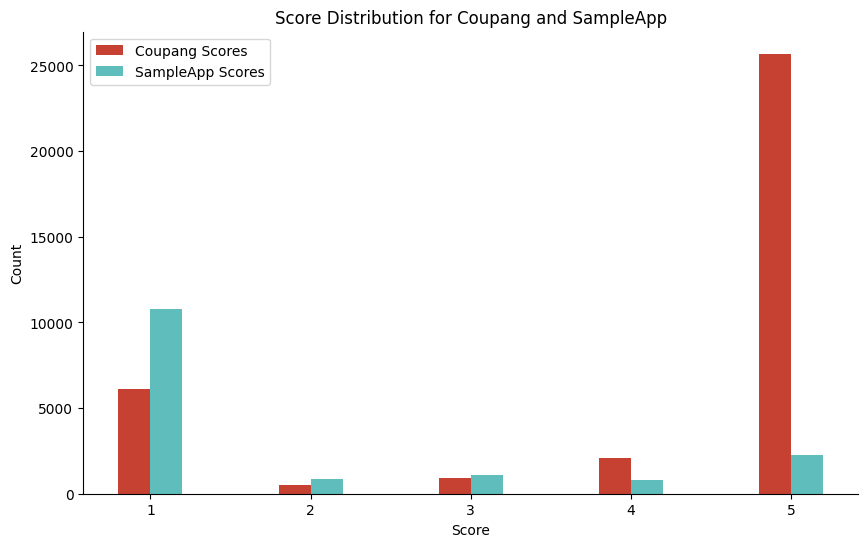

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of scores
scores = range(int(min(coupang_reviews_df['score'].min(), sampleapp_reviews_df['score'].min())),
               int(max(coupang_reviews_df['score'].max(), sampleapp_reviews_df['score'].max())) + 1)

# Count the occurrences of each score for both dataframes
coupang_score_counts = coupang_reviews_df['score'].value_counts().reindex(scores, fill_value=0)
sampleapp_score_counts = sampleapp_reviews_df['score'].value_counts().reindex(scores, fill_value=0)

# Define the width of the bars
bar_width = 0.2

# Define X positions for both sets of bars
x = np.arange(len(scores))
x_coupang = x - bar_width / 2
x_sampleapp = x + bar_width / 2

# Plotting the bars for both datasets
plt.figure(figsize=(10, 6))
plt.bar(x_coupang, coupang_score_counts, width=bar_width, color="#C64132", label='Coupang Scores')
plt.bar(x_sampleapp, sampleapp_score_counts, width=bar_width, color="#5FBEBB", label='SampleApp Scores')

# Aesthetic improvements
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution for Coupang and SampleApp')
plt.xticks(x, scores)  # Set X-axis ticks to the score values
plt.legend()

plt.show()

**쿠팡이츠 주 별 Score 점수의 추이**


> 이상치(2021.07)를 제외한 대부분의 구간에서 score - 5 점수가 많이 작성되었음을 확인



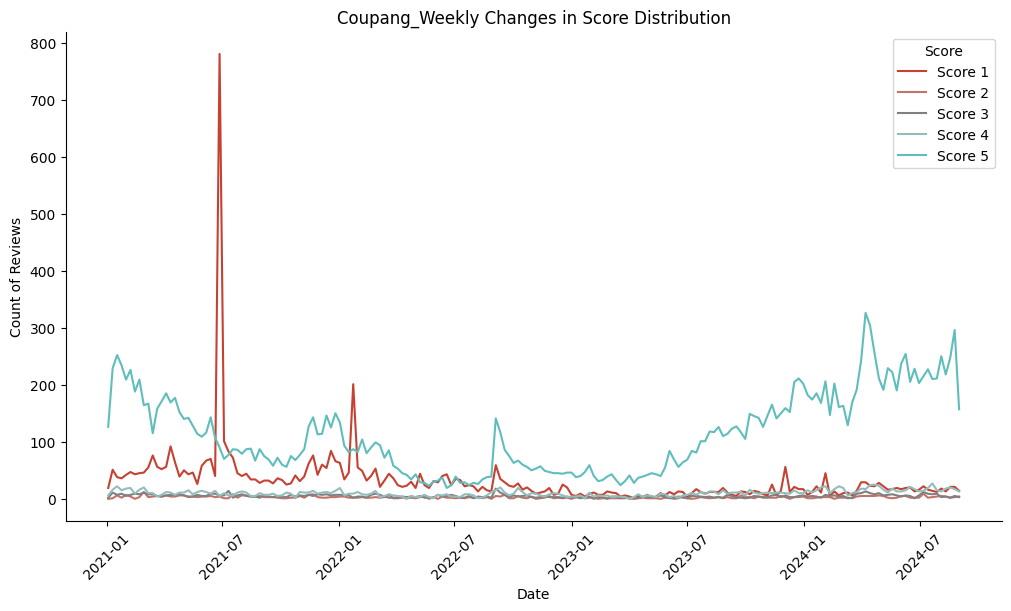

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the date column is in datetime format
coupang_reviews_df['date'] = pd.to_datetime(coupang_reviews_df['date'])

# Resample by week and group by 'score' to calculate the weekly count of each score
weekly_scores = coupang_reviews_df.groupby([pd.Grouper(key='date', freq='W'), 'score']).size().unstack(fill_value=0)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Define colors for each score
colors = {
    1: '#C64132',  # Red
    2: '#c47268',    # Green
    3: 'gray',     # Blue
    4: '#93bdbc',   # Orange
    5: '#5FBEBB'     # Black
}

# Plot each score with its respective color
for score in range(1, 6):
    ax.plot(weekly_scores.index, weekly_scores[score], label=f'Score {score}', color=colors[score])

# Aesthetic improvements
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Count of Reviews')
plt.title('Coupang_Weekly Changes in Score Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Score')
plt.show()

**배달의민족 주 별 Score 점수의 추이**

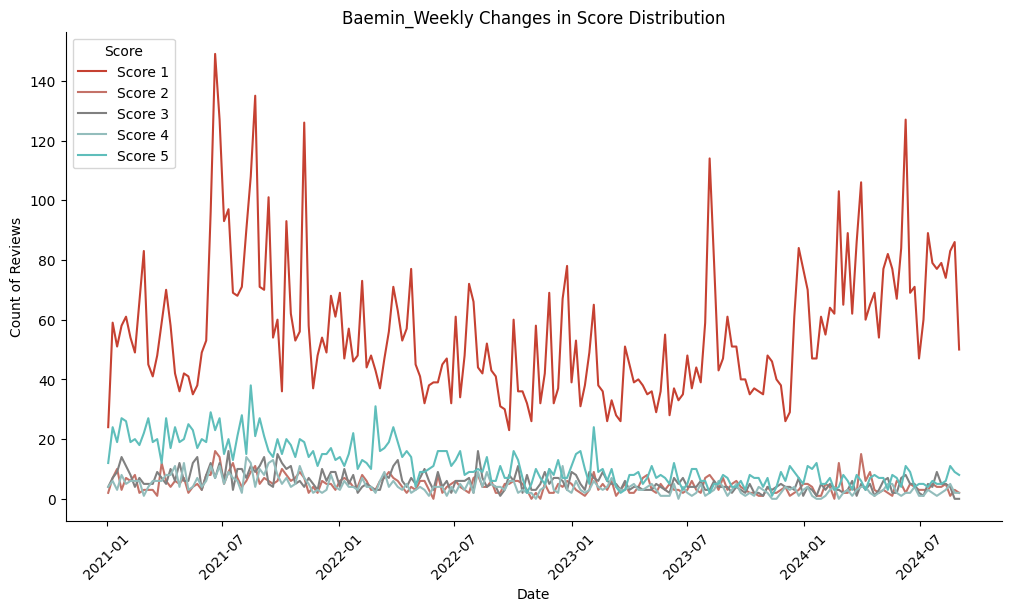

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the date column is in datetime format
sampleapp_reviews_df['date'] = pd.to_datetime(sampleapp_reviews_df['date'])

# Resample by week and group by 'score' to calculate the weekly count of each score
weekly_scores = sampleapp_reviews_df.groupby([pd.Grouper(key='date', freq='W'), 'score']).size().unstack(fill_value=0)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Define colors for each score
colors = {
    1: '#C64132',  # Red
    2: '#c47268',    # Green
    3: 'gray',     # Blue
    4: '#93bdbc',   # Orange
    5: '#5FBEBB'     # Black
}

# Plot each score with its respective color
for score in range(1, 6):
    ax.plot(weekly_scores.index, weekly_scores[score], label=f'Score {score}', color=colors[score])

# Aesthetic improvements
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Count of Reviews')
plt.title('Baemin_Weekly Changes in Score Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Score')
plt.show()

**쿠팡이츠 VS 배달의민족 리뷰 수**

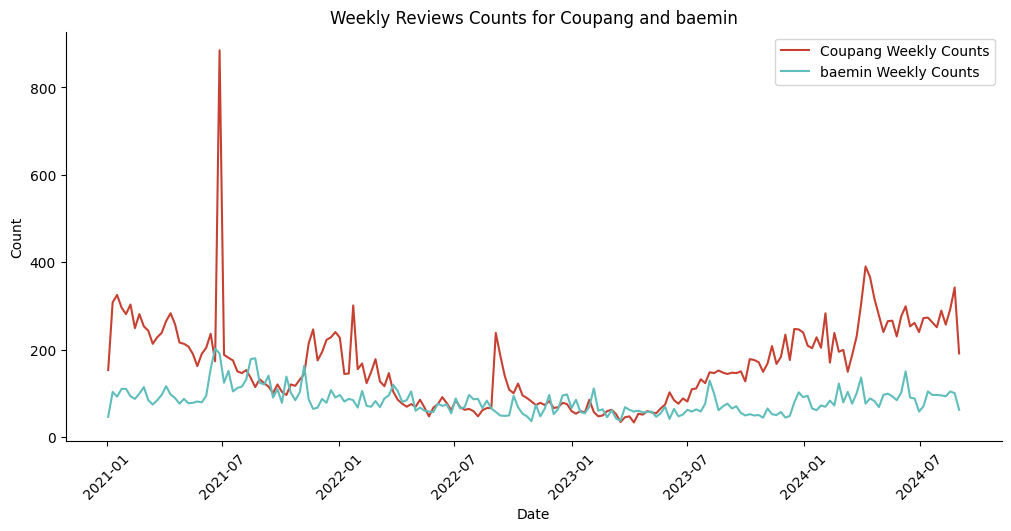

In [ ]:
def _plot_series(series, series_name, series_color):
    # Ensure the date column is in datetime format
    series['date'] = pd.to_datetime(series['date'])
    # Resample to weekly, summing the counts for each week
    weekly_counts = series.resample('W', on='date').size()
    weekly_counts = weekly_counts.reset_index(name='counts')
    xs = weekly_counts['date']
    ys = weekly_counts['counts']
    plt.plot(xs, ys, label=series_name, color=series_color)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Plot coupang_reviews_df in #C64132 color
df_sorted_coupang = coupang_reviews_df.sort_values('date', ascending=True)
_plot_series(df_sorted_coupang, 'Coupang Weekly Counts', '#C64132')

# Plot sampleapp_reviews_df in #5FBEBB color
df_sorted_sampleapp = sampleapp_reviews_df.sort_values('date', ascending=True)
_plot_series(df_sorted_sampleapp, 'baemin Weekly Counts', '#5FBEBB')

# Aesthetic improvements
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Weekly Reviews Counts for Coupang and baemin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

**쿠팡이츠 VS 배달의민족 평균 별점**

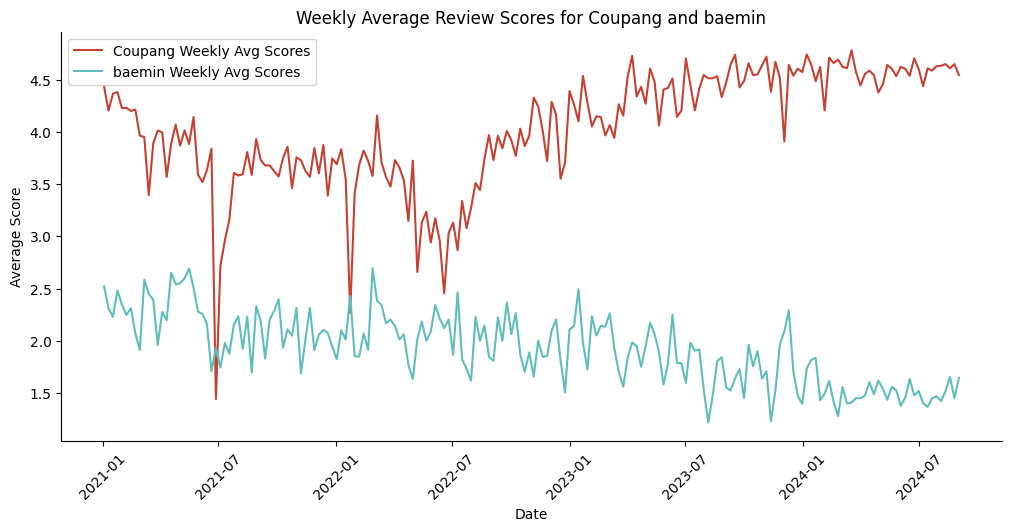

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def _plot_series(series, series_name, series_color):
    # Ensure the date column is in datetime format
    series['date'] = pd.to_datetime(series['date'])
    # Resample to weekly, calculating the average score for each week
    weekly_avg_scores = series.resample('W', on='date')['score'].mean()  # Calculate weekly average of scores
    weekly_avg_scores = weekly_avg_scores.reset_index(name='average_score')
    xs = weekly_avg_scores['date']
    ys = weekly_avg_scores['average_score']
    plt.plot(xs, ys, label=series_name, color=series_color)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Custom colors
custom_red = '#C64132'
original_coupang_color = '#5FBEBB'

# Plot coupang_reviews_df in red
df_sorted_coupang = coupang_reviews_df.sort_values('date', ascending=True)
_plot_series(df_sorted_coupang, 'Coupang Weekly Avg Scores',custom_red)

# Plot sampleapp_reviews_df with the original coupang color
df_sorted_sampleapp = sampleapp_reviews_df.sort_values('date', ascending=True)
_plot_series(df_sorted_sampleapp, 'baemin Weekly Avg Scores', original_coupang_color)

# Aesthetic improvements
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.title('Weekly Average Review Scores for Coupang and baemin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

##### 워드클라우드

In [4]:
!apt-get update -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [5]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [6]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

**연 기준 리뷰 워드클라우드_쿠팡이츠**

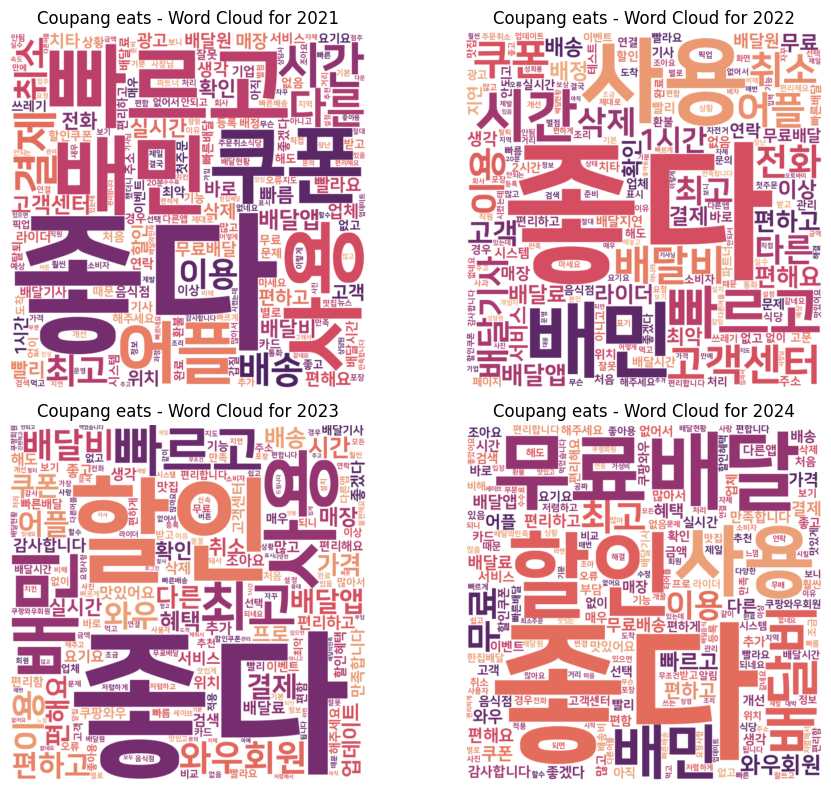

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

# Assuming you have a DataFrame `df` with a 'date' column in 'YYYY-MM-DD' format
# and a 'content' column containing the text data.

# Convert 'date' to datetime and extract the year
coupang_reviews_df['year'] = pd.to_datetime(coupang_reviews_df['date']).dt.year

# Generate a word cloud for each year from 2021 to 2024
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the 2x2 grid into a list for easier access

# Loop through each year from 2021 to 2024
for i, year in enumerate(range(2021, 2025)):
    # Filter the DataFrame by year
    year_data = coupang_reviews_df[coupang_reviews_df['year'] == year]

    # Concatenate all 'content' into a single string
    #text = ' '.join(year_data['filtered_content'].dropna())

    # Flatten lists in 'filtered_content' column before joining
    text = ' '.join([' '.join(content) if isinstance(content, list) else content for content in year_data['filtered_content'].dropna()])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',font_path=fontpath, colormap="flare", collocations=False).generate(text)

    # Plot the word cloud in the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Coupang eats - Word Cloud for {year}')

plt.tight_layout()
plt.show()

**연 기준 리뷰 워드클라우드_배달의민족**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


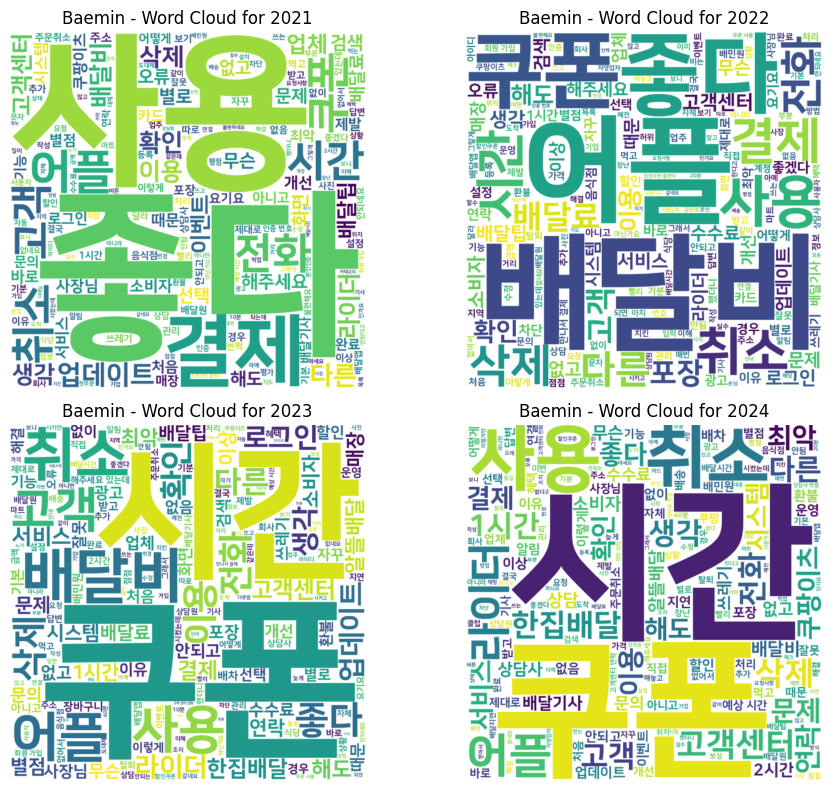

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Assuming you have a DataFrame `df` with a 'date' column in 'YYYY-MM-DD' format
# and a 'content' column containing the text data.

# Convert 'date' to datetime and extract the year
sampleapp_reviews_df['year'] = pd.to_datetime(sampleapp_reviews_df['date']).dt.year

# Generate a word cloud for each year from 2021 to 2024
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the 2x2 grid into a list for easier access

# Loop through each year from 2021 to 2024
for i, year in enumerate(range(2021, 2025)):
    # Filter the DataFrame by year
    year_data = sampleapp_reviews_df[sampleapp_reviews_df['year'] == year]

    # Concatenate all 'content' into a single string
    #text = ' '.join(year_data['filtered_content'].dropna())

    # Flatten lists in 'filtered_content' column before joining
    text = ' '.join([' '.join(content) if isinstance(content, list) else content for content in year_data['filtered_content'].dropna()])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',font_path=fontpath).generate(text)

    # Plot the word cloud in the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Baemin - Word Cloud for {year}')

plt.tight_layout()
plt.show()

**쿠팡이츠 score - 4,5점인 경우에 대해서만 워드클라우드**


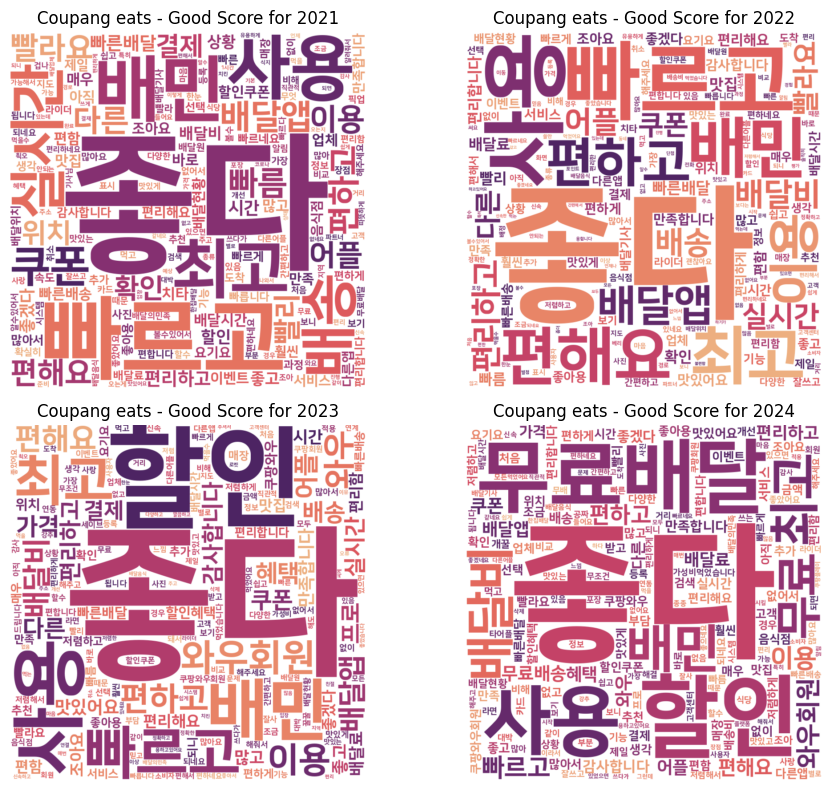

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Convert 'date' to datetime and extract the year
coupang_reviews_df['year'] = pd.to_datetime(coupang_reviews_df['date']).dt.year

# Filter DataFrame for only scores 1 and 2
filtered_df = coupang_reviews_df[coupang_reviews_df['score'].isin([4, 5])]

# Generate a word cloud for each year from 2021 to 2024
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the 2x2 grid into a list for easier access

# Loop through each year from 2021 to 2024
for i, year in enumerate(range(2021, 2025)):
    # Filter the DataFrame by year
    year_data = filtered_df[filtered_df['year'] == year]

    # Concatenate all 'content' into a single string
    #text = ' '.join(year_data['filtered_content'].dropna())


    # Flatten lists in 'filtered_content' column before joining
    text = ' '.join([' '.join(content) if isinstance(content, list) else content for content in year_data['filtered_content'].dropna()])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',font_path=fontpath, colormap="flare", collocations=False).generate(text)

    # Plot the word cloud in the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Coupang eats - Good Score for {year}')

plt.tight_layout()
plt.show()

**쿠팡이츠 score - 1,2점인 경우에 대해서만 워드클라우드**



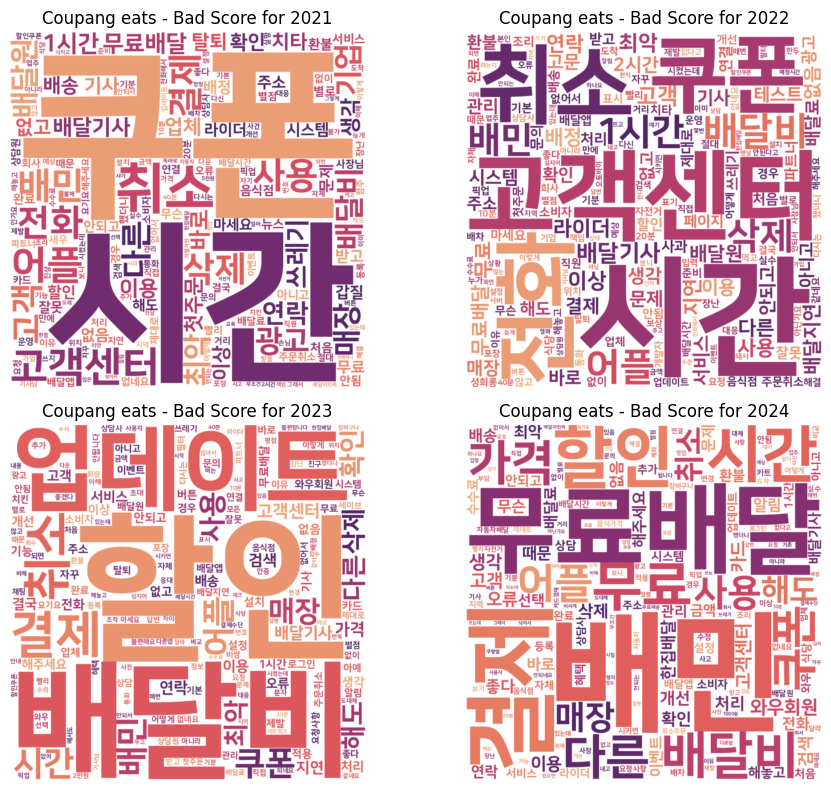

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Convert 'date' to datetime and extract the year
coupang_reviews_df['year'] = pd.to_datetime(coupang_reviews_df['date']).dt.year

# Filter DataFrame for only scores 1 and 2
filtered_df = coupang_reviews_df[coupang_reviews_df['score'].isin([1, 2])]

# Generate a word cloud for each year from 2021 to 2024
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the 2x2 grid into a list for easier access

# Loop through each year from 2021 to 2024
for i, year in enumerate(range(2021, 2025)):
    # Filter the DataFrame by year
    year_data = filtered_df[filtered_df['year'] == year]

    # Concatenate all 'content' into a single string
    #text = ' '.join(year_data['filtered_content'].dropna())


    # Flatten lists in 'filtered_content' column before joining
    text = ' '.join([' '.join(content) if isinstance(content, list) else content for content in year_data['filtered_content'].dropna()])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',font_path=fontpath, colormap="flare", collocations=False).generate(text)

    # Plot the word cloud in the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Coupang eats - Bad Score for {year}')

plt.tight_layout()
plt.show()

**배달의민족 score - 4,5점인 경우에 대해서만 워드클라우드**



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


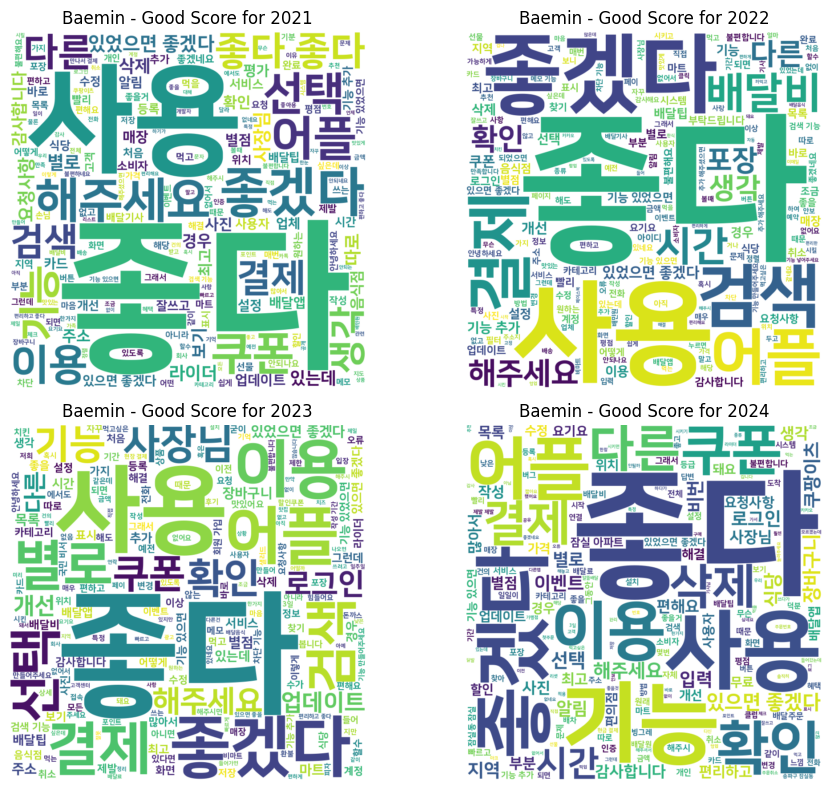

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Convert 'date' to datetime and extract the year
sampleapp_reviews_df['year'] = pd.to_datetime(sampleapp_reviews_df['date']).dt.year

# Filter DataFrame for only scores 1 and 2
filtered_df = sampleapp_reviews_df[sampleapp_reviews_df['score'].isin([4, 5])]

# Generate a word cloud for each year from 2021 to 2024
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the 2x2 grid into a list for easier access

# Loop through each year from 2021 to 2024
for i, year in enumerate(range(2021, 2025)):
    # Filter the DataFrame by year
    year_data = filtered_df[filtered_df['year'] == year]

    # Concatenate all 'content' into a single string
    #text = ' '.join(year_data['filtered_content'].dropna())


    # Flatten lists in 'filtered_content' column before joining
    text = ' '.join([' '.join(content) if isinstance(content, list) else content for content in year_data['filtered_content'].dropna()])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',font_path=fontpath).generate(text)

    # Plot the word cloud in the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Baemin - Good Score for {year}')

plt.tight_layout()
plt.show()

**배달의 민족 score - 1,2점인 경우에 대해서만 워드클라우드**



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


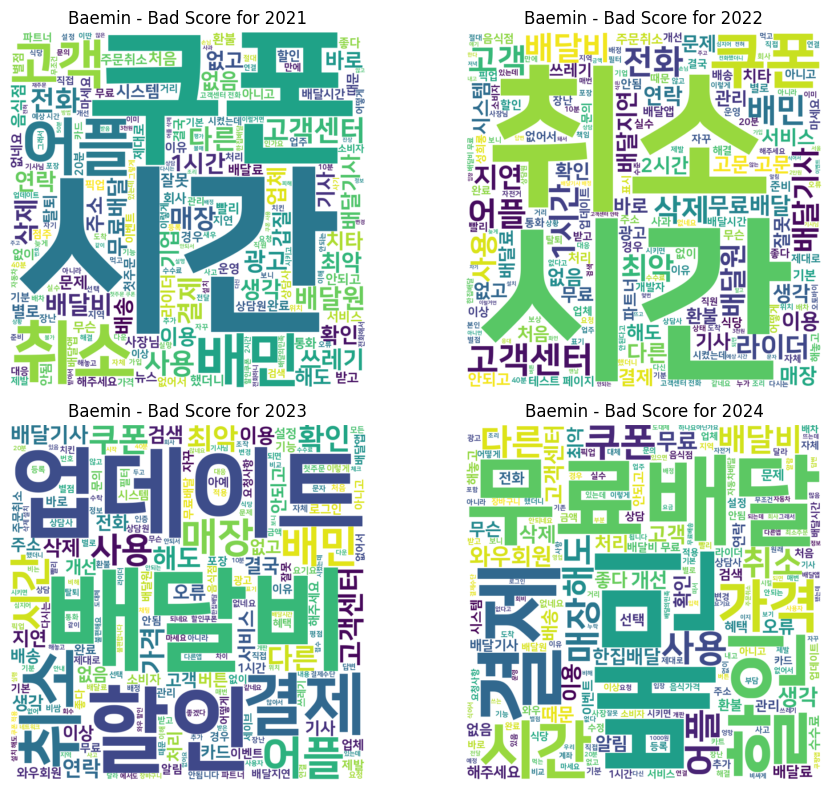

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Convert 'date' to datetime and extract the year
coupang_reviews_df['year'] = pd.to_datetime(coupang_reviews_df['date']).dt.year

# Filter DataFrame for only scores 1 and 2
filtered_df = coupang_reviews_df[coupang_reviews_df['score'].isin([1, 2])]

# Generate a word cloud for each year from 2021 to 2024
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the 2x2 grid into a list for easier access

# Loop through each year from 2021 to 2024
for i, year in enumerate(range(2021, 2025)):
    # Filter the DataFrame by year
    year_data = filtered_df[filtered_df['year'] == year]

    # Concatenate all 'content' into a single string
    #text = ' '.join(year_data['filtered_content'].dropna())


    # Flatten lists in 'filtered_content' column before joining
    text = ' '.join([' '.join(content) if isinstance(content, list) else content for content in year_data['filtered_content'].dropna()])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',font_path=fontpath).generate(text)

    # Plot the word cloud in the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Baemin - Bad Score for {year}')

plt.tight_layout()
plt.show()

### **LDA**

In [ ]:
import numpy as np
import pandas as pd
import warnings # 경고 메시지 무시
warnings.filterwarnings(action='ignore')
# 한국어 형태소 분석기 중 성능이 가장 우수한 Mecab 사용
from tqdm import tqdm # 작업 프로세스 시각화
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim # LDA 시각화용 패키지
from collections import Counter # 단어 등장 횟수 카운트1pip

In [ ]:
NUM_TOPICS = 10 # 토픽 개수는 하이퍼파라미터

# passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정
PASSES = 15

######쿠팡이츠 LDA

In [ ]:
# 형태소 분석된 텍스트를 리스트로 변환
coupang_reviews_tokenized = coupang_reviews_df['filtered_content'].tolist()

# Dictionary 생성
dictionary = corpora.Dictionary(coupang_reviews_tokenized)

# Corpus 생성
corpus = [dictionary.doc2bow(review) for review in coupang_reviews_tokenized]

def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model1 = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model1, corpus, dictionary

In [ ]:
# 토픽 별 구성 단어 비율

def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./coupang_topic_prop.xlsx')
    display(topic_prop)

In [ ]:
# 시각화 결과

def lda_visualize(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    RESULT_FILE = './coupang_lda_result.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

LDA 토픽 모델링 결과 시각화

In [ ]:
model1, corpus, dictionary = lda_modeling(coupang_reviews_tokenized)
NUM_WORDS = 10

In [ ]:
topics = model1.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

topic_num                                          word_prop
0          1  0.083*"사용" + 0.050*"이용" + 0.039*"다른" + 0.038*"...
1          2  0.147*"배민" + 0.028*"최악" + 0.023*"기업" + 0.016*"...
2          3  0.482*"좋다" + 0.100*"빠르고" + 0.033*"편하고" + 0.031...
3          4  0.050*"배달비" + 0.036*"빠름" + 0.035*"빨리" + 0.021*...
4          5  0.038*"편해요" + 0.035*"위치" + 0.035*"배달원" + 0.030...
5          6  0.040*"시간" + 0.033*"전화" + 0.032*"고객센터" + 0.020...
6          7  0.069*"최고" + 0.021*"상황" + 0.020*"확인" + 0.019*"...
7          8  0.015*"고객" + 0.013*"배달기사" + 0.013*"쿠폰" + 0.012...
8          9  0.086*"할인" + 0.073*"쿠폰" + 0.037*"무료배달" + 0.023...
9         10  0.043*"결제" + 0.037*"취소" + 0.016*"빠른배달" + 0.015...

In [ ]:
lda_visualize(model1, corpus, dictionary)

######쿠팡이츠 긍정 LDA

In [ ]:
positive_coupang_reviews_df = coupang_reviews_df[coupang_reviews_df['score'].isin([4, 5])]

In [ ]:
# 형태소 분석된 텍스트를 리스트로 변환
positive_coupang_reviews_tokenized = positive_coupang_reviews_df['filtered_content'].tolist()

# Dictionary 생성
dictionary = corpora.Dictionary(positive_coupang_reviews_tokenized)

# Corpus 생성
corpus = [dictionary.doc2bow(review) for review in positive_coupang_reviews_tokenized]

def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model1 = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model1, corpus, dictionary

In [ ]:
# 토픽 별 구성 단어 비율

def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./positive_coupang_topic_prop.xlsx')
    display(topic_prop)

In [ ]:
# 시각화 결과

def lda_visualize(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    RESULT_FILE = './positive_coupang_lda_result.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

LDA 토픽 모델링 결과 시각화

In [ ]:
model1, corpus, dictionary = lda_modeling(positive_coupang_reviews_tokenized)
NUM_WORDS = 10

In [ ]:
topics = model1.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

topic_num                                          word_prop
0          1  0.100*"쿠폰" + 0.062*"할인" + 0.043*"좋고" + 0.026*"...
1          2  0.212*"최고" + 0.034*"편리합니다" + 0.028*"배달앱" + 0.0...
2          3  0.221*"사용" + 0.035*"감사합니다" + 0.035*"매우" + 0.03...
3          4  0.070*"배달앱" + 0.069*"다른" + 0.029*"편함" + 0.026*...
4          5  0.099*"배민" + 0.047*"이용" + 0.041*"빨라요" + 0.016*...
5          6  0.505*"좋다" + 0.092*"빠르고" + 0.036*"편하고" + 0.029...
6          7  0.037*"많고" + 0.037*"조아요" + 0.035*"할인" + 0.034*...
7          8  0.049*"빠른배달" + 0.044*"어플" + 0.035*"맛집" + 0.026...
8          9  0.086*"빠름" + 0.033*"서비스" + 0.025*"와우회원" + 0.02...
9         10  0.052*"편해요" + 0.037*"배달비" + 0.035*"빨리" + 0.031...

In [ ]:
lda_visualize(model1, corpus, dictionary)

######쿠팡이츠 부정 LDA -> 실행X

In [ ]:
negative_coupang_reviews_df = coupang_reviews_df[coupang_reviews_df['score'].isin([1, 2])]

In [ ]:
# 형태소 분석된 텍스트를 리스트로 변환
negative_coupang_reviews_tokenized = negative_coupang_reviews_df['filtered_content'].tolist()

# Dictionary 생성
dictionary = corpora.Dictionary(negative_coupang_reviews_tokenized)

# Corpus 생성
corpus = [dictionary.doc2bow(review) for review in negative_coupang_reviews_tokenized]

def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model1 = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model1, corpus, dictionary

In [ ]:
# 토픽 별 구성 단어 비율

def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./negative_coupang_topic_prop.xlsx')
    display(topic_prop)

In [ ]:
# 시각화 결과

def lda_visualize(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    RESULT_FILE = './negative_coupang_lda_result.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

LDA 토픽 모델링 결과 시각화

In [ ]:
model1, corpus, dictionary = lda_modeling(negative_coupang_reviews_tokenized)
NUM_WORDS = 10

In [ ]:
topics = model1.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

topic_num                                          word_prop
0          1  0.100*"쿠폰" + 0.062*"할인" + 0.043*"좋고" + 0.026*"...
1          2  0.212*"최고" + 0.034*"편리합니다" + 0.028*"배달앱" + 0.0...
2          3  0.221*"사용" + 0.035*"감사합니다" + 0.035*"매우" + 0.03...
3          4  0.070*"배달앱" + 0.069*"다른" + 0.029*"편함" + 0.026*...
4          5  0.099*"배민" + 0.047*"이용" + 0.041*"빨라요" + 0.016*...
5          6  0.505*"좋다" + 0.092*"빠르고" + 0.036*"편하고" + 0.029...
6          7  0.037*"많고" + 0.037*"조아요" + 0.035*"할인" + 0.034*...
7          8  0.049*"빠른배달" + 0.044*"어플" + 0.035*"맛집" + 0.026...
8          9  0.086*"빠름" + 0.033*"서비스" + 0.025*"와우회원" + 0.02...
9         10  0.052*"편해요" + 0.037*"배달비" + 0.035*"빨리" + 0.031...

In [ ]:
lda_visualize(model1, corpus, dictionary)

##### 배달의민족 LDA

In [ ]:
# 형태소 분석된 텍스트를 리스트로 변환
sampleapp_reviews_tokenized = sampleapp_reviews_df['filtered_content'].tolist()

# Dictionary 생성
dictionary = corpora.Dictionary(sampleapp_reviews_tokenized)

# Corpus 생성
corpus = [dictionary.doc2bow(review) for review in sampleapp_reviews_tokenized]

def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model1 = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model1, corpus, dictionary

In [ ]:
# 토픽 별 구성 단어 비율

def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./sampleapp_topic_prop.xlsx')
    display(topic_prop)

In [ ]:
# 시각화 결과

def lda_visualize(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    RESULT_FILE = './sampleapp_lda_result.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

LDA 토픽 모델링 결과 시각화

In [ ]:
model1, corpus, dictionary = lda_modeling(sampleapp_reviews_tokenized)
NUM_WORDS = 10

In [ ]:
topics = model1.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

topic_num                                          word_prop
0          1  0.014*"고객" + 0.014*"별점" + 0.014*"삭제" + 0.011*"...
1          2  0.042*"쓰레기" + 0.029*"어플" + 0.018*"안되네요" + 0.01...
2          3  0.024*"기업" + 0.020*"수수료" + 0.016*"자영업자" + 0.01...
3          4  0.039*"배달비" + 0.032*"배달팁" + 0.011*"거리" + 0.009...
4          5  0.066*"쿠폰" + 0.029*"사용" + 0.020*"배달료" + 0.015*...
5          6  0.023*"시간" + 0.020*"취소" + 0.020*"전화" + 0.019*"...
6          7  0.031*"기능" + 0.028*"업데이트" + 0.026*"좋겠다" + 0.01...
7          8  0.012*"사용" + 0.009*"아이디" + 0.009*"수저" + 0.009*...
8          9  0.069*"결제" + 0.023*"오류" + 0.019*"포장" + 0.016*"...
9         10  0.088*"좋다" + 0.034*"로그인" + 0.031*"인증" + 0.025*...

In [ ]:
lda_visualize(model1, corpus, dictionary)

##### 배달의민족 긍정 LDA -> 실행X

In [ ]:
positive_sampleapp_reviews_df = sampleapp_reviews_df[sampleapp_reviews_df['score'].isin([4, 5])]

In [ ]:
# 형태소 분석된 텍스트를 리스트로 변환
positive_sampleapp_reviews_tokenized = positive_sampleapp_reviews_df['filtered_content'].tolist()

# Dictionary 생성
dictionary = corpora.Dictionary(positive_sampleapp_reviews_tokenized)

# Corpus 생성
corpus = [dictionary.doc2bow(review) for review in positive_sampleapp_reviews_tokenized]

def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model1 = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model1, corpus, dictionary

In [ ]:
# 토픽 별 구성 단어 비율

def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./positive_sampleapp_topic_prop.xlsx')
    display(topic_prop)

In [ ]:
# 시각화 결과

def lda_visualize(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    RESULT_FILE = './positive_sampleapp_lda_result.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

LDA 토픽 모델링 결과 시각화

In [ ]:
model1, corpus, dictionary = lda_modeling(positive_sampleapp_reviews_tokenized)
NUM_WORDS = 10

In [ ]:
topics = model1.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

topic_num                                          word_prop
0          1  0.014*"고객" + 0.014*"별점" + 0.014*"삭제" + 0.011*"...
1          2  0.042*"쓰레기" + 0.029*"어플" + 0.018*"안되네요" + 0.01...
2          3  0.024*"기업" + 0.020*"수수료" + 0.016*"자영업자" + 0.01...
3          4  0.039*"배달비" + 0.032*"배달팁" + 0.011*"거리" + 0.009...
4          5  0.066*"쿠폰" + 0.029*"사용" + 0.020*"배달료" + 0.015*...
5          6  0.023*"시간" + 0.020*"취소" + 0.020*"전화" + 0.019*"...
6          7  0.031*"기능" + 0.028*"업데이트" + 0.026*"좋겠다" + 0.01...
7          8  0.012*"사용" + 0.009*"아이디" + 0.009*"수저" + 0.009*...
8          9  0.069*"결제" + 0.023*"오류" + 0.019*"포장" + 0.016*"...
9         10  0.088*"좋다" + 0.034*"로그인" + 0.031*"인증" + 0.025*...

In [ ]:
lda_visualize(model1, corpus, dictionary)

##### 배달의민족 부정 LDA

In [ ]:
negative_sampleapp_reviews_df = sampleapp_reviews_df[sampleapp_reviews_df['score'].isin([1, 2])]

In [ ]:
# 형태소 분석된 텍스트를 리스트로 변환
negative_sampleapp_reviews_tokenized = negative_sampleapp_reviews_df['filtered_content'].tolist()

# Dictionary 생성
dictionary = corpora.Dictionary(negative_sampleapp_reviews_tokenized)

# Corpus 생성
corpus = [dictionary.doc2bow(review) for review in negative_sampleapp_reviews_tokenized]

def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model1 = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model1, corpus, dictionary

In [ ]:
# 토픽 별 구성 단어 비율

def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./negative_sampleapp_topic_prop.xlsx')
    display(topic_prop)

In [ ]:
# 시각화 결과

def lda_visualize(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    RESULT_FILE = './negative_sampleapp_lda_result.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

LDA 토픽 모델링 결과 시각화

In [ ]:
model1, corpus, dictionary = lda_modeling(negative_sampleapp_reviews_tokenized)
NUM_WORDS = 10

In [ ]:
topics = model1.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

topic_num                                          word_prop
0          1  0.034*"배달비" + 0.014*"배달료" + 0.012*"쿠폰" + 0.008...
1          2  0.010*"평가" + 0.008*"식당" + 0.007*"요청사항" + 0.007...
2          3  0.052*"쿠폰" + 0.023*"사용" + 0.015*"첫주문" + 0.014*...
3          4  0.023*"최악" + 0.016*"불편해요" + 0.013*"기능" + 0.009...
4          5  0.026*"쓰레기" + 0.024*"어플" + 0.019*"소비자" + 0.017...
5          6  0.017*"주소" + 0.015*"민족" + 0.008*"번쩍" + 0.005*"...
6          7  0.025*"삭제" + 0.012*"쿠팡이츠" + 0.011*"작성" + 0.010...
7          8  0.048*"결제" + 0.022*"로그인" + 0.021*"인증" + 0.017*...
8          9  0.038*"업데이트" + 0.018*"화면" + 0.016*"별로" + 0.014...
9         10  0.021*"시간" + 0.020*"고객센터" + 0.020*"취소" + 0.017...

In [ ]:
lda_visualize(model1, corpus, dictionary)